# Codigo de población 

Dado que necesitamos poblar una base de datos con un documento con el formato .csv descargado de la web [https://exoplanetarchive.ipac.caltech.edu/docs/data.html], el tipo de base de datos mas conveniente es uno NO-SQL del estilo documento, en nuestro caso es Mongodb por la comodidad y facil importacion de documentos a la base de datos a traves de este.

Para este proyecto usamos un archivo descargado de la pagina mencionada, en el apartado de data/planetary system, modificando para que no considere las columnas de: 

-Default Parameter Set

-Solution Type

-Controversial Flag

-Planet Radius [Earth Radius y Jupiter Radius]

-Insolation Flux [Earth Flux]

-Equilibrium Temperature [ K ]

La razon de que no esten estos datos en nuestro set de datos, es porque no contenian muchos datos, y que eran datos que se repetian muchas veces, no siendo nuestra prioridad con nuestra base de datos.

Acontinuacion, se hace las poblacion de la base de datos:

In [1]:
#Librerías
from pymongo import MongoClient
import pandas as pd


#Funciones
def create_profiles_collection(db, collection_name):
    '''esta funcion nos permite crear las colecciones en mongodb a través de db.create_collection
    ---------------------------------------------------------------------------------------------
    parametros: 
    1) db, será la base de datos
    2) collection_name sera el nombre de la coleccion de mongo'''
    
    if collection_name not in db.list_collection_names():
        db.create_collection(collection_name)
    else:
        print(f"la colección'{collection_name}' ya existe.")

def insert_data_to_mongo(db, collection_name, data_frame):
    '''esta funcion sirve para ingresar datos de un dataframe a la coleccion de la base de datos de mongodb
    -------------------------------------------------------------------------------------------------------
    parametros:
    1) db, será la base de datos
    2) colecction_name será el nombre de la coleccion donde se agregaran los datos
    3) data_frame será el dataframe obtenidos a partir del archivo exoplanets.csv'''
    
    collection = db[collection_name]
    records = data_frame.to_dict(orient='records')
    collection.insert_many(records)

#Lectura de datos del .csv
path = 'Exoplanet.csv'
df = pd.read_csv(path, skiprows = 41, header = 0)

#Creacion de la base de datos
client = MongoClient("localhost", 27017)
db = client['Exoplanet_A'] # cramos la base de datos Exoplanet_A

#Contado de nombres para las colecciones
metodos = df['discoverymethod'].value_counts().keys()
dataframes_por_metodo = {}

#Filtración, creación de colecciones y poblamiento de base de datos segun el metodo de descubrimiento
for metodo in metodos:
    df_metodo = df[df["discoverymethod"] == metodo].drop(columns=["discoverymethod"]) #Filtro
    create_profiles_collection(db, metodo)  # Creación de colección
    insert_data_to_mongo(db, metodo, df_metodo)  # Inserción de datos

print(db.list_collection_names())

Collection 'Transit' already exists.
Collection 'Radial Velocity' already exists.
Collection 'Microlensing' already exists.
Collection 'Transit Timing Variations' already exists.
Collection 'Imaging' already exists.
Collection 'Eclipse Timing Variations' already exists.
Collection 'Orbital Brightness Modulation' already exists.
Collection 'Pulsar Timing' already exists.
Collection 'Astrometry' already exists.
Collection 'Pulsation Timing Variations' already exists.
Collection 'Disk Kinematics' already exists.
['Orbital Brightness Modulation', 'Microlensing', 'Eclipse Timing Variations', 'Imaging', 'Transit', 'Astrometry', 'Pulsar Timing', 'Transit Timing Variations', 'Disk Kinematics', 'Radial Velocity', 'Pulsation Timing Variations']


# Visualización de datos 
una vez tengamos nuestra base de datos poblada tambien en conveniente visualizar los datos para así tener un mayor entendimiento a la hora de hacer las 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from scipy.stats import norm

Procesando colección: Orbital Brightness Modulation


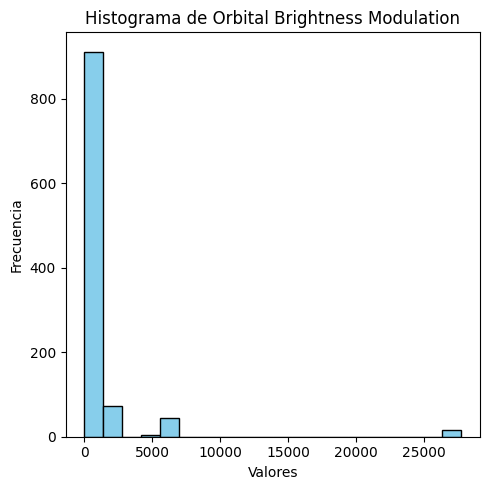

Procesando colección: Microlensing


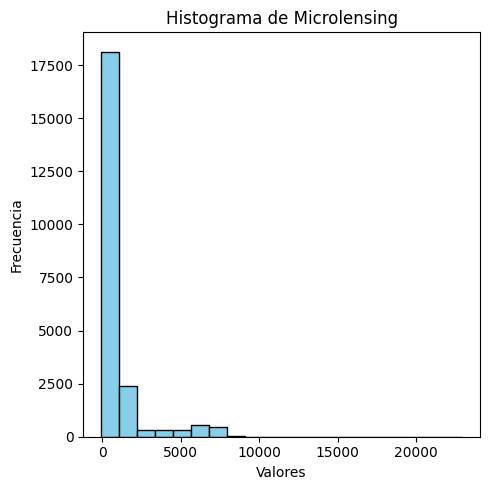

Procesando colección: Eclipse Timing Variations


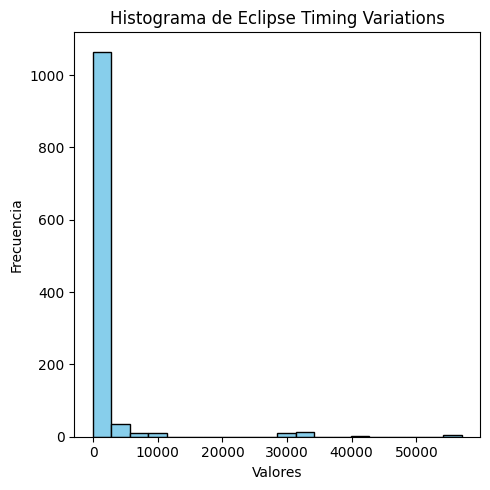

Procesando colección: Imaging


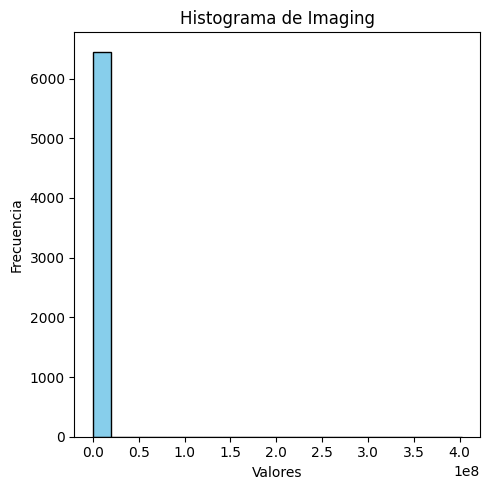

Procesando colección: Transit


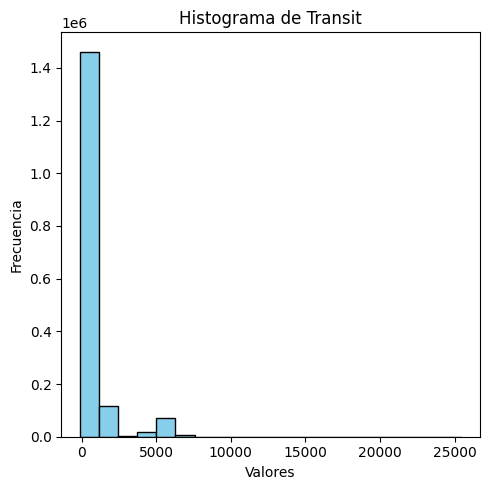

Procesando colección: Astrometry


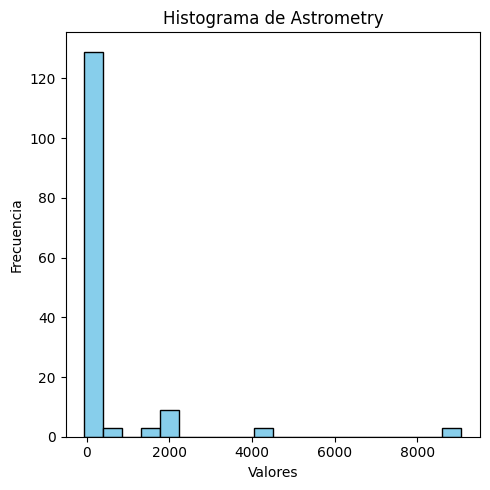

Procesando colección: Pulsar Timing


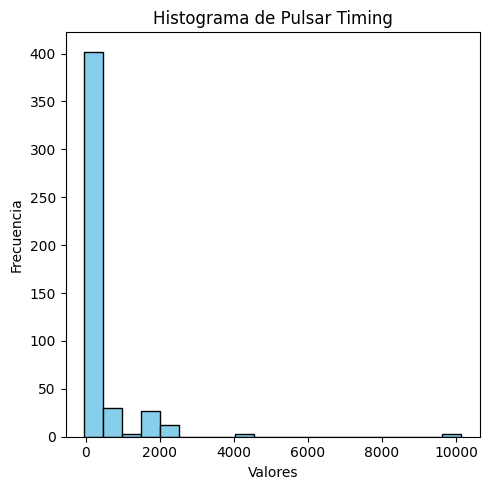

Procesando colección: Transit Timing Variations


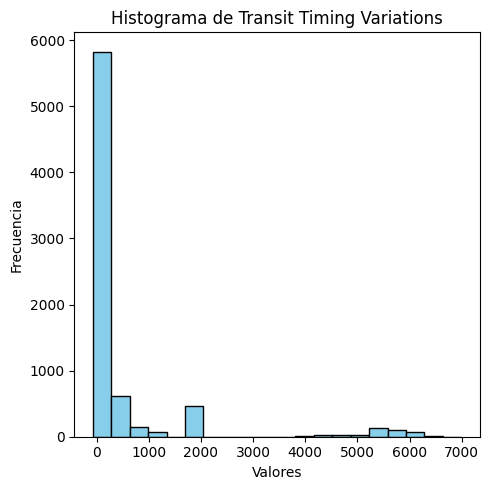

Procesando colección: Disk Kinematics


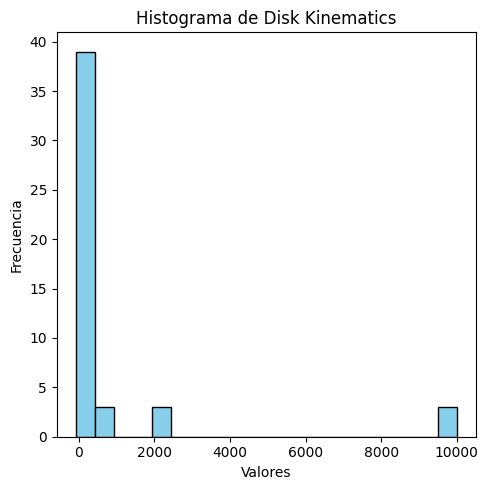

Procesando colección: Radial Velocity


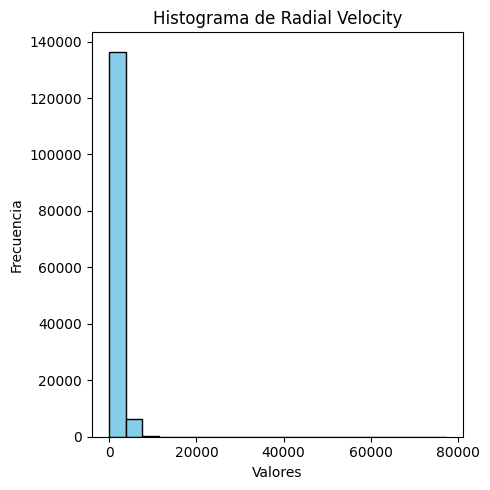

Procesando colección: Pulsation Timing Variations


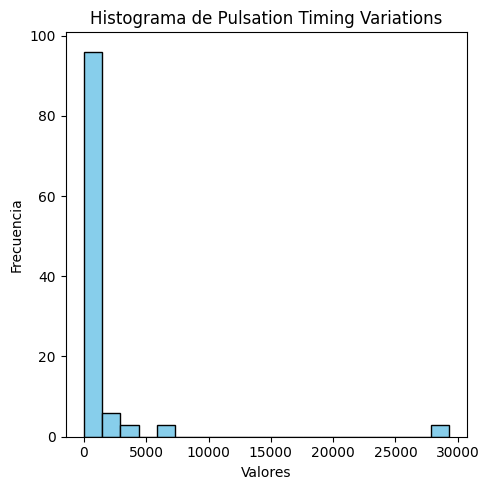

In [9]:
# Lista de nombres de las colecciones
colecciones = db.list_collection_names()

# Iterar sobre cada colección y graficar un histograma
for coleccion in colecciones:
    col = db[coleccion]  # Acceder a la colección
    valores = []  # Lista para almacenar los valores específicos de cada colección
    
    print(f"Procesando colección: {coleccion}")  # Mensaje de depuración
    
    # Extraer valores de interés de cada documento
    for doc in col.find():
        for key, value in doc.items():  # Iterar sobre los campos del documento
            if isinstance(value, (int, float)):  # Buscar valores numéricos
                valores.append(value)  # Almacenar valores numéricos
    
    # Verificar si hay datos que graficar
    if valores:
        # Crear un histograma para la colección actual
        plt.figure(figsize=(5, 5))
        plt.hist(valores, bins=20, color='skyblue', edgecolor='black')
        plt.xlabel("Valores")
        plt.ylabel("Frecuencia")
        plt.title(f"Histograma de {coleccion}")
        plt.tight_layout()
        plt.show()
    else:
        print(f"No hay valores numéricos para graficar en la colección '{coleccion}'.")
